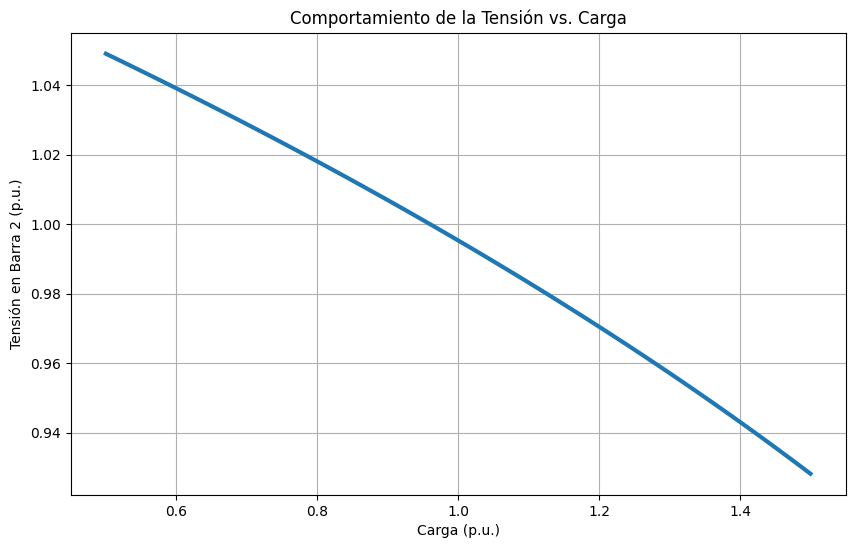

[1.049076032336532, 1.0480858563137916, 1.0470922298273162, 1.0460951269827554, 1.0450945215407705, 1.0440903869106375, 1.0430826961436963, 1.042071421926639, 1.0410565365746391, 1.0400380120243098, 1.0390158198264938, 1.037989931138868, 1.0369603167183703, 1.0359269469134385, 1.03488979165605, 1.0338488204535605, 1.0328040023803433, 1.0317553060692042, 1.0307026997025848, 1.0296461510046535, 1.0285856272272993, 1.0275210951482125, 1.0264525210557134, 1.0253798707402075, 1.0243031094839066, 1.0232222020502786, 1.0221371126732113, 1.021047805045889, 1.0199542423093582, 1.0188563870407854, 1.0177542012413912, 1.016647646324048, 1.0155366831005348, 1.0144212717684318, 1.013301371897645, 1.0121769424165499, 1.0110479415977376, 1.0099143270433526, 1.008776055670001, 1.0076330836932266, 1.0064853666115239, 1.0053328591898831, 1.0041755154428476, 1.003013288617058, 1.0018461311732785, 1.0006739947678722, 0.9994968302337114, 0.9983145875605068, 0.9971272158745184, 0.9959346634176425, 0.9947368

In [3]:
import pandapower as pp
import matplotlib.pyplot as plt
import numpy as np

# Red de referencia
net = pp.create_empty_network()

# Barras
bus1 = pp.create_bus(net, vn_kv=500, name="Bus 1")
bus2 = pp.create_bus(net, vn_kv=500, name="Bus 2")

# Datos de la linea 
length_km = 500  
r_ohm_per_km = 0.02  
x_ohm_per_km = 0.115
c_nf_per_km = 19.1  
max_i_ka = 1

#Generador
pp.create_gen(net, bus=bus1, p_mw=100, vm_pu=1.0, name="Generator 1")

# Lineas de transmisión(Escogido a partir de las especificacones que nos entrega la tarea desde la libreria PandaPower.)
pp.create_line_from_parameters(net, from_bus=bus1, to_bus=bus2, length_km=length_km,
                               r_ohm_per_km=r_ohm_per_km, x_ohm_per_km=x_ohm_per_km,
                               c_nf_per_km=c_nf_per_km, max_i_ka=max_i_ka, name='Línea 1')
pp.create_line_from_parameters(net, from_bus=bus1, to_bus=bus2, length_km=length_km,
                               r_ohm_per_km=r_ohm_per_km, x_ohm_per_km=x_ohm_per_km,
                               c_nf_per_km=c_nf_per_km, max_i_ka=max_i_ka, name='Línea 2')


# Barra slack
pp.create_ext_grid(net, bus=bus1, vm_pu=1.0)

# Carga nominal
p_nominal = 1080  # MW
q_nominal = 523.068   # MVAr
s_nominal = complex(p_nominal, q_nominal) #MVA

# Rango de carga ±50%
p_values = np.linspace(0.5 * p_nominal, 1.5 * p_nominal, 100)
q_values = np.linspace(0.5 * q_nominal, 1.5 * q_nominal, 100)
voltages = []

# Simular para cada valor de carga
for p, q in zip(p_values, q_values):
    pp.create_load(net, bus=bus2, p_mw=p, q_mvar=q)
    pp.runpp(net)
    voltages.append(net.res_bus.vm_pu[bus2])
    net.load.drop(net.load.index, inplace=True)  # Resetear las cargas para la próxima simulación

# Graficar los resultados
plt.figure(figsize=(10,6))
plt.plot(p_values / p_nominal, voltages, '-', label="Tensión en Barra 2", color='tab:blue', linewidth=3)
plt.title('Comportamiento de la Tensión vs. Carga')
plt.xlabel('Carga (p.u.)')
plt.ylabel('Tensión en Barra 2 (p.u.)')
plt.grid()
plt.show()